# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [18]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  52016      0 --:--:-- --:--:-- --:--:-- 52219']

In [19]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [4]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    # return NotImplemented 
    if len(array2) == len(array1) + 1:
        array2 = array2[:-1]
    return sum(x * y for x, y in zip(array1, array2))

def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    # return NotImplemented
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    # return NotImplemented
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    # return NotImplemented
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


def test_function():
    # Test dot product
    assert dot_product([1, 2, 3], [4, 5, 6]) == 32
    # Test sigmoid
    assert math.isclose(sigmoid(0), 0.5, rel_tol=1e-9)
    # Test output
    assert math.isclose(output([1, 2, 3], [4, 5, 6]), 1, rel_tol=1e-7)
    # Test predict
    assert predict([1, 2, 3], [4, 5, 6]) == 1
    # Test get_accuracy
    assert get_accuracy([1, 2, 3], [[4, 5, 6, 1], [7, 8, 9, 0]]) == 50.0
    print('All tests passed')

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Initialize weights (including the bias weight) to zero.
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Compute the weighted input.
            in_value = dot_product(weights, instance)
            # Apply the sigmoid function to get the model output.
            output = sigmoid(in_value)
            # Compute the error
            error = instance[-1] - output
            # Update each weight: adjusting in the opposite direction of the gradient
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

test_function()

All tests passed


## Run it

In [5]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
The predict only returns either 1 or 0, but the sigmoid function returns a value between 0 and 1. The error gradient is calculated as the difference between the actual value and the predicted value. Updating weights in a perceptron, how much to adjust the weights is determined by the error gradient. With `predict`, no such information.



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [9]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learning rate: 

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A. Increasing the training set size to full training dataset does not necessarily lead to higher test accuracy. With a learning rate of 0.005 over 100 epochs, using 20, 200, or 300 training examples produced test accuracies of 85.7%. With the full size of the training dataset, the test accuracy was 71.4%, because of more variance and over-fitting.

B. The second run, despite using more training data, perform worse because the hyperparameters are not optimally tuned for the larger dataset. With more data, the model might require a different learning rate or more epochs to properly converge. The learning rate of 0.005 might be too small for the larger dataset, and the model might not have had enough time to converge in 20 epochs.

C. Yes, it is possible to achieve test accuracies higher than 80% by further exploring and fine-tuning additional hyperparameters. Adjustments such as experimenting with different learning rate schedules, varying the number of epochs, or introducing techniques like regularization could enhance the model's generalization performance.

D. Not always. Increasing the number of epochs can lead to diminishing returns or even overfitting if the model starts memorizing the training data. When the training error continues to drop but the test accuracy stagnates or worsens, it indicates the tradeoff is achieved. It is essential to monitor the training and test accuracies to determine the optimal number of epochs for the model.

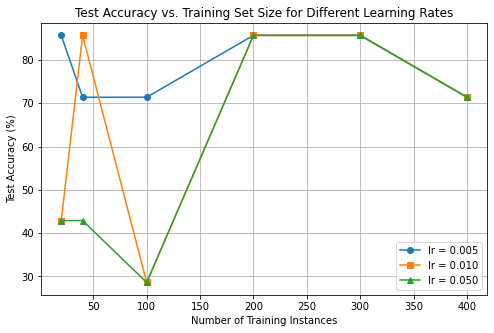

In [7]:
import matplotlib.pyplot as plt

training_sizes = [20, 40, 100, 200, 300, 400]
accuracy_lr005 = [85.7, 71.4, 71.4, 85.7, 85.7, 71.4]
accuracy_lr010 = [42.9, 85.7, 28.6, 85.7, 85.7, 71.4]
accuracy_lr050 = [42.9, 42.9, 28.6, 85.7, 85.7, 71.4]

plt.figure(figsize=(8, 5))
plt.plot(training_sizes, accuracy_lr005, marker='o', label='lr = 0.005')
plt.plot(training_sizes, accuracy_lr010, marker='s', label='lr = 0.010')
plt.plot(training_sizes, accuracy_lr050, marker='^', label='lr = 0.050')
plt.xlabel('Number of Training Instances')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs. Training Set Size for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

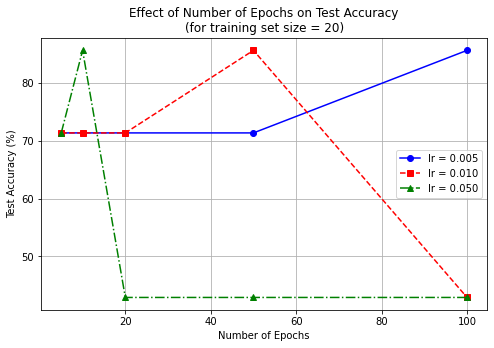

In [11]:
import matplotlib.pyplot as plt

epochs = [5, 10, 20, 50, 100]

accuracies_lr005 = [71.4, 71.4, 71.4, 71.4, 85.7]  # lr = 0.005
accuracies_lr010 = [71.4, 71.4, 71.4, 85.7, 42.9]  # lr = 0.010
accuracies_lr050 = [71.4, 85.7, 42.9, 42.9, 42.9]  # lr = 0.050

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracies_lr005, marker='o', linestyle='-', color='blue', label='lr = 0.005')
plt.plot(epochs, accuracies_lr010, marker='s', linestyle='--', color='red', label='lr = 0.010')
plt.plot(epochs, accuracies_lr050, marker='^', linestyle='-.', color='green', label='lr = 0.050')

plt.xlabel('Number of Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Effect of Number of Epochs on Test Accuracy\n(for training set size = 20)')
plt.legend()
plt.grid(True)
plt.show()
